In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
from sklearn.cluster import DBSCAN
from imutils import build_montages
import numpy as np
import argparse
import pickle
import cv2
from skimage import io

# for loading/processing the images  
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.vgg19 import preprocess_input 

# models 
from keras.applications.vgg16 import VGG16 
from keras.applications.vgg19 import VGG19
from keras.applications.resnet import ResNet50
from keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt 


import sys,os 
sys.path.append(os.path.abspath(r"/content/gdrive/MyDrive/519project/CIS519_FINAL_project-20211202T191237Z-001/CIS519_FINAL_project/FaceClusteringDemo/")) 
import frame_extractor

In [ ]:
# support functions
def extract_features(file, model):
  img = load_img(file, target_size=(224,224))
  img = np.array(img)

  reshaped_img = img.reshape(1,224,224,3)
  imgx = preprocess_input(reshaped_img)
  features = model.predict(imgx, use_multiprocessing=True)
  return features

def cluster(rootPath, cluster_type):
  path = rootPath
  os.chdir(path)

  heads = []
  with os.scandir(path) as files:
    for file in files:
      if file.name.endswith('.jpg'):
        heads.append(file.name)

  model = VGG19()
  model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

  data = {}
  p = rootPath + "Features/"

  for head in heads:
    try:
      feat = extract_features(head, model)
      data[head] = feat

    except:
      with open(p, 'wb') as file:
        pickle.dump(data, file)

  filenames = np.array(list(data.keys()))
  feat = np.array(list(data.values()))
  feat = feat.reshape(-1,4096)

  label = [0] * 15 + [1] * 15 + [2] * 13
  unique_labels = list(set(label))
  # pca = PCA(n_components=5, random_state=22)
  # pca.fit(feat)
  # x = pca.transform(feat)
  x = feat

  if cluster_type == 'kmeans':
    clt = KMeans(n_clusters=8)
    clt.fit(x)
  elif cluster_type == 'HAC':
    clt = AgglomerativeClustering(n_clusters = None, distance_threshold = 110)
    clt.fit(x)
  elif cluster_type == 'dbscan':
    clt = DBSCAN(eps = 0.2, algorithm="brute")
    clt.fit(x)
    
  # kmeans = KMeans(n_clusters=8)
  # kmeans.fit(x)

  # dbscan = DBSCAN(eps = 0.2, algorithm="brute")
  # dbscan.fit(x)

  groups = {}
  for file,cluster in zip(filenames, clt.labels_):
    if cluster not in groups.keys():
      groups[cluster] = []
      groups[cluster].append(file)
    else:
      groups[cluster].append(file)
  return groups

In [ ]:
# This block is to extracting frames from video inputs
# pathIn is the parameter where the input video clip is
# pathOut is the directory where the frames should be stored

# using time.time() to monitor the execution time
import time
T1 = time.time()

frame_extractor.video2frames(pathIn="/content/gdrive/MyDrive/519project/CIS519_FINAL_project-20211202T191237Z-001/CIS519_FINAL_project/FaceClusteringDemo/VideoInput/01.mp4",
             pathOut= "/content/gdrive/MyDrive/519project/CIS519_FINAL_project-20211202T191237Z-001/CIS519_FINAL_project/FaceClusteringDemo/VideoOutput1/",
             extract_time_interval = 10)

T2 = time.time()
print('程序运行时间:%s毫秒' % ((T2 - T1)*1000))

Converting a video into frames......
Write a new frame: True, 1th
Write a new frame: True, 2th
Write a new frame: True, 3th
Write a new frame: True, 4th
Write a new frame: True, 5th
Write a new frame: True, 6th
Write a new frame: True, 7th
Write a new frame: True, 8th
Write a new frame: True, 9th
Write a new frame: True, 10th
Write a new frame: True, 11th
Write a new frame: True, 12th
Write a new frame: True, 13th
Write a new frame: True, 14th
Write a new frame: True, 15th
Write a new frame: True, 16th
Write a new frame: True, 17th
Write a new frame: True, 18th
Write a new frame: True, 19th
Write a new frame: True, 20th
Write a new frame: True, 21th
Write a new frame: True, 22th
Write a new frame: True, 23th
Write a new frame: True, 24th
Write a new frame: True, 25th
Write a new frame: True, 26th
Write a new frame: True, 27th
Write a new frame: True, 28th
Write a new frame: True, 29th
Write a new frame: True, 30th
Write a new frame: True, 31th
Write a new frame: True, 32th
Write a new 

In [ ]:
# cd to the directory where anime-face-detector-master is, the .py program is responsible for detecting & extracting faces from
# frames we just created.

# also, we need to append the path to system, in order to import the extractor_interface.

# for the function extractor_interface.extract(), we need two parameters,
# The first parameter is the directory where the frames (we extracted before) are, (Input)
# The second parameter is the directory where you want the extracted faces to be. (Output)

%cd /content/gdrive/MyDrive/CIS519_FINAL_project/anime-face-detector-master/
!make clean
!make
sys.path.append(os.path.abspath(r"/content/gdrive/MyDrive/519project/CIS519_FINAL_project-20211202T191237Z-001/CIS519_FINAL_project/anime-face-detector-master/")) 
import extractor_interface
import time

T1 = time.time()
extractor_interface.extract("/content/gdrive/MyDrive/519project/CIS519_FINAL_project-20211202T191237Z-001/CIS519_FINAL_project/FaceClusteringDemo/VideoOutput1/","/content/gdrive/MyDrive/519project/CIS519_FINAL_project-20211202T191237Z-001/CIS519_FINAL_project/FaceClusteringDemo/PicsOutput4/")
T2 = time.time()
print('程序运行时间:%s毫秒' % ((T2 - T1)*1000))

[Errno 2] No such file or directory: '/content/gdrive/MyDrive/CIS519_FINAL_project/anime-face-detector-master/'
/content
make: *** No rule to make target 'clean'.  Stop.
make: *** No targets specified and no makefile found.  Stop.
type is
['/content/gdrive/MyDrive/519project/CIS519_FINAL_project-20211202T191237Z-001/CIS519_FINAL_project/FaceClusteringDemo/VideoOutput2/frame_000001.jpg', '/content/gdrive/MyDrive/519project/CIS519_FINAL_project-20211202T191237Z-001/CIS519_FINAL_project/FaceClusteringDemo/VideoOutput2/frame_000002.jpg', '/content/gdrive/MyDrive/519project/CIS519_FINAL_project-20211202T191237Z-001/CIS519_FINAL_project/FaceClusteringDemo/VideoOutput2/frame_000003.jpg', '/content/gdrive/MyDrive/519project/CIS519_FINAL_project-20211202T191237Z-001/CIS519_FINAL_project/FaceClusteringDemo/VideoOutput2/frame_000004.jpg', '/content/gdrive/MyDrive/519project/CIS519_FINAL_project-20211202T191237Z-001/CIS519_FINAL_project/FaceClusteringDemo/VideoOutput2/frame_000005.jpg', '/content/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


Instructions for updating:
box_ind is deprecated, use box_indices instead
INFO:tensorflow:Restoring parameters from /content/gdrive/MyDrive/519project/CIS519_FINAL_project-20211202T191237Z-001/CIS519_FINAL_project/anime-face-detector-master/model/res101_faster_rcnn_iter_60000.ckpt
[1/665] Elapsed: 0:00.000, ETA:: 0:00.000 >> /content/gdrive/MyDrive/519project/CIS519_FINAL_project-20211202T191237Z-001/CIS519_FINAL_project/FaceClusteringDemo/VideoOutput2/frame_000001.jpg
cv2
[2/665] Elapsed: 0:11.292, ETA:: 2:04:58.216 >> /content/gdrive/MyDrive/519project/CIS519_FINAL_project-20211202T191237Z-001/CIS519_FINAL_project/FaceClusteringDemo/VideoOutput2/frame_000002.jpg
cv2
[3/665] Elapsed: 0:21.233, ETA:: 1:57:19.027 >> /content/gdrive/MyDrive/519project/CIS519_FINAL_project-20211202T191237Z-001/CIS519_FINAL_project/FaceClusteringDemo/VideoOutput2/frame_000003.jpg
cv2
[4/665] Elapsed: 0:31.216, ETA:: 1:54:48.374 >> /content/gdrive/MyDrive/519project/CIS519_FINAL_project-20211202T191237Z-001

In [ ]:
# rootPath is the directory which stored all the extracted pictures. i.e., the output directory for extractor_interface.extract.
# Note that the method cluster takes two parameters,
# The first parameter is rootPath, as specified above.
# The second parameter is the cluster algorithm - kmeans, HAC, dbscan

import time
T1 = time.time()
rootPath = "/content/gdrive/MyDrive/519project/CIS519_FINAL_project-20211202T191237Z-001/CIS519_FINAL_project/FaceClusteringDemo/PicsOutput4/"

groups = cluster(rootPath, 'HAC')
T2 = time.time()
print('程序运行时间:%s毫秒' % ((T2 - T1)*1000))

程序运行时间:520427.69956588745毫秒


In [ ]:
# This block is to show how many groups we divided our dataset into
# and the length of each group
print("The total number of groups is: " + str(len(groups))

18

17


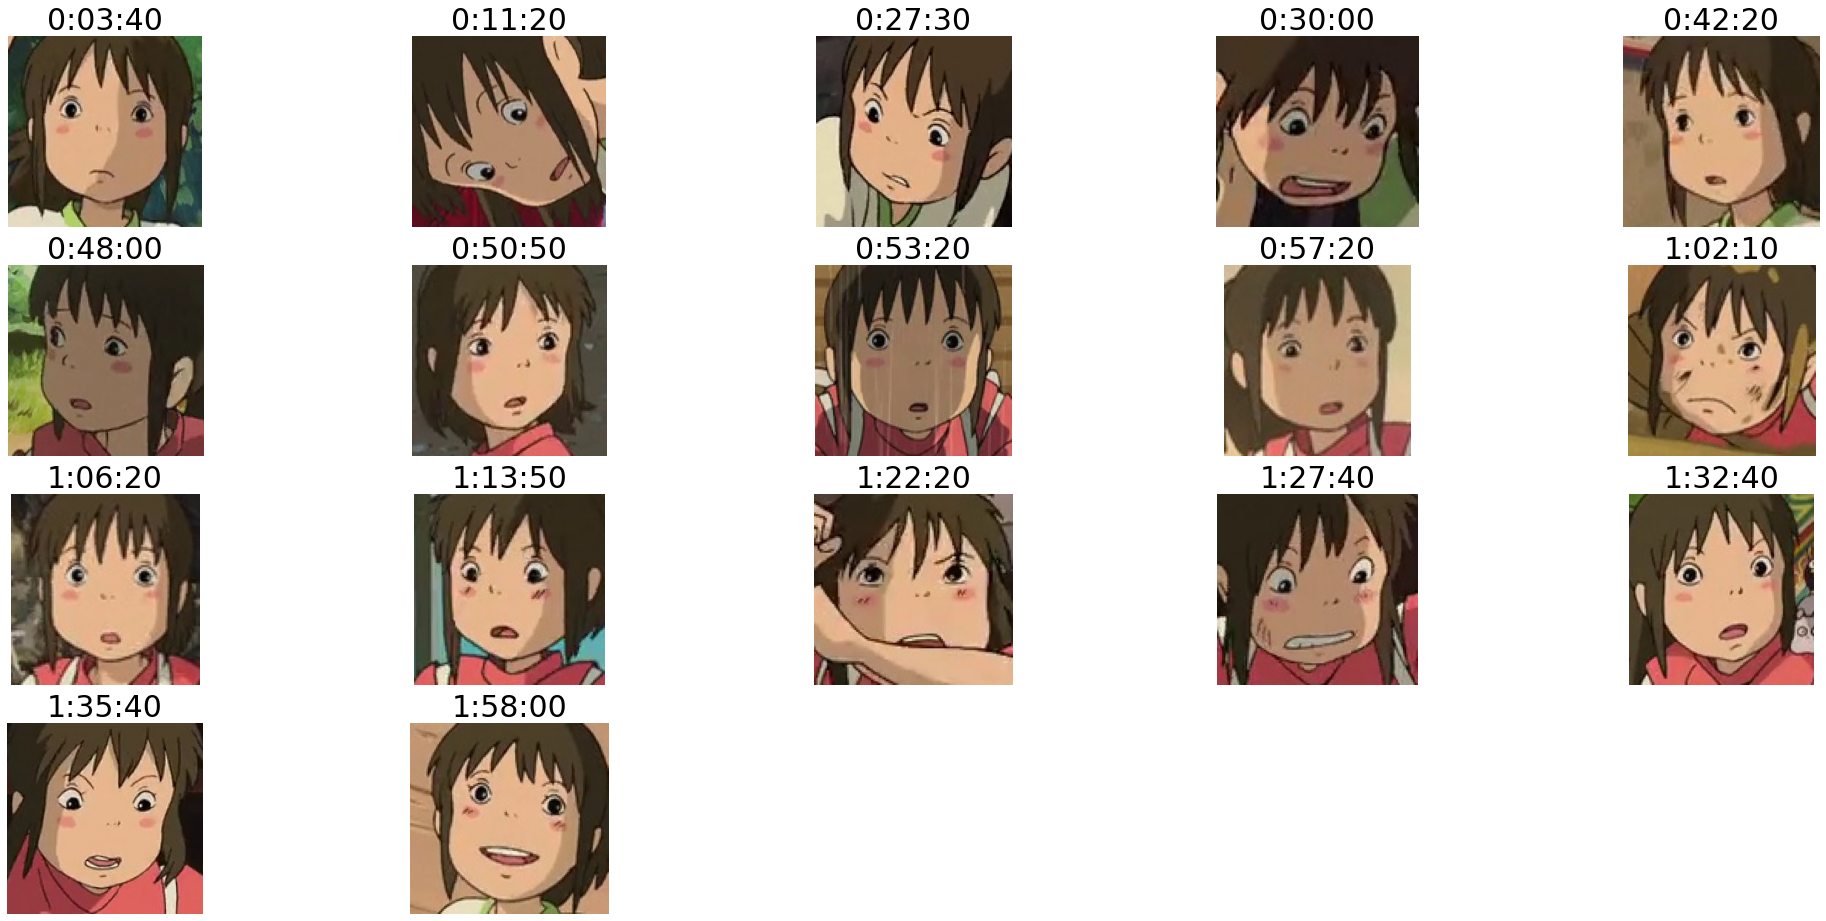

In [ ]:
# The block is used to display the output anime faces according to the groups they are assigned to
# The method display takes only 1 parameter, namely the kth group.
# By changing this parameter k, you may decide which group to present.
k=7

fig = plt.figure(figsize=(35, 210))
columns = 5
rows  = 50

j = 1
print(len(groups[k]))
for i in groups[k]:
  img = rootPath + i
  img = load_img(img) # reads image
  fig.add_subplot(rows, columns, j)
  plt.imshow(img)
  second=int((i.split("_")[1]))*10
  m, s = divmod(second, 60)
  h, m = divmod(m, 60)
  plt.title(("%d:%02d:%02d"%(h,m,s)),fontsize=30)
  plt.axis('off')
  j += 1